<a href="https://colab.research.google.com/github/SergiyDovgopolyk/Data_Science/blob/main/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
url = f'https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv'

table = pd.read_csv(url)

print(table.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [3]:
print(table.shape)

(8704, 25)


In [4]:
print(table.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [19]:
missing_ratios = round((table.isnull().sum() / len(table)), 3)

print(missing_ratios)

N                                   0.000
Посада                              0.000
Мова програмування                  0.442
Спеціалізація                       0.829
Загальний досвід роботи             0.000
Досвід роботи на поточному місці    0.000
Зарплата на місяць                  0.000
Зміна зарплати за 12 місяців        0.000
Місто                               0.000
Розмір компанії                     0.000
Тип компанії                        0.000
Стать                               0.000
Вік                                 0.000
Освіта                              0.000
Університет                         0.041
Ще студент                          0.000
Рівень англійської                  0.000
Предметна область                   0.026
Дата заповнення                     0.000
User.Agent                          0.000
exp                                 0.000
current_job_exp                     0.000
salary                              0.000
Валюта                            

In [6]:
new_table = pd.DataFrame(table)

missing_ratios = new_table.isnull().sum() / len(new_table)

# Видалення стовпців з пропусками, крім "Мова програмування"
columns_to_drop = missing_ratios[missing_ratios > 0].index.tolist()
columns_to_drop.remove('Мова програмування')  # Залишаємо лише "Мова програмування"
new_table.drop(columns=columns_to_drop, inplace=True)

print(new_table)

         N                    Посада Мова програмування  \
0        1        Junior QA engineer                NaN   
1        2        Junior QA engineer                NaN   
2        3         Software Engineer            C#/.NET   
3        4         Software Engineer         JavaScript   
4        5  Senior Software Engineer         JavaScript   
...    ...                       ...                ...   
8699  8700               QA engineer                NaN   
8700  8701                 Marketing                NaN   
8701  8702  Junior Software Engineer         Ruby/Rails   
8702  8703                 Team lead                NaN   
8703  8704  Senior Software Engineer               Java   

     Загальний досвід роботи Досвід роботи на поточному місці  \
0                        0.5                              0.5   
1            менше 3 місяців                  менше 3 місяців   
2                          4                                1   
3                          5   

In [20]:
missing_ratios = round((new_table.isnull().sum() / len(new_table)), 2)
print(missing_ratios)

N                                   0.00
Посада                              0.00
Мова програмування                  0.44
Загальний досвід роботи             0.00
Досвід роботи на поточному місці    0.00
Зарплата на місяць                  0.00
Зміна зарплати за 12 місяців        0.00
Місто                               0.00
Розмір компанії                     0.00
Тип компанії                        0.00
Стать                               0.00
Вік                                 0.00
Освіта                              0.00
Ще студент                          0.00
Рівень англійської                  0.00
Дата заповнення                     0.00
User.Agent                          0.00
exp                                 0.00
current_job_exp                     0.00
salary                              0.00
dtype: float64


In [8]:
data = new_table.dropna()

print(data)

         N                    Посада Мова програмування  \
2        3         Software Engineer            C#/.NET   
3        4         Software Engineer         JavaScript   
4        5  Senior Software Engineer         JavaScript   
6        7  Junior Software Engineer            C#/.NET   
7        8  Senior Software Engineer                C++   
...    ...                       ...                ...   
8692  8693         Software Engineer               Java   
8694  8695  Junior Software Engineer            C#/.NET   
8695  8696         Software Engineer             Python   
8701  8702  Junior Software Engineer         Ruby/Rails   
8703  8704  Senior Software Engineer               Java   

     Загальний досвід роботи Досвід роботи на поточному місці  \
2                          4                                1   
3                          5                                4   
4          10 і більше років                              0.5   
6                          1   

In [9]:
print(data.shape)

(4854, 20)


In [10]:
python_data = data[data['Мова програмування'] == 'Python']

print(python_data)

         N                    Посада Мова програмування  \
12      13         Software Engineer             Python   
68      69         Software Engineer             Python   
87      88  Junior Software Engineer             Python   
114    115  Junior Software Engineer             Python   
143    144  Junior Software Engineer             Python   
...    ...                       ...                ...   
8546  8547         Software Engineer             Python   
8625  8626         Software Engineer             Python   
8635  8636  Senior Software Engineer             Python   
8673  8674  Junior Software Engineer             Python   
8695  8696         Software Engineer             Python   

     Загальний досвід роботи Досвід роботи на поточному місці  \
12                         1                  менше 3 місяців   
68                       1.5                              0.5   
87                       0.5                              0.5   
114                      1.5   

In [11]:
print(python_data.shape)

(207, 20)


In [39]:
grouped_specialists = python_data.groupby(by="Посада").size()
print(grouped_specialists)

Посада
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64


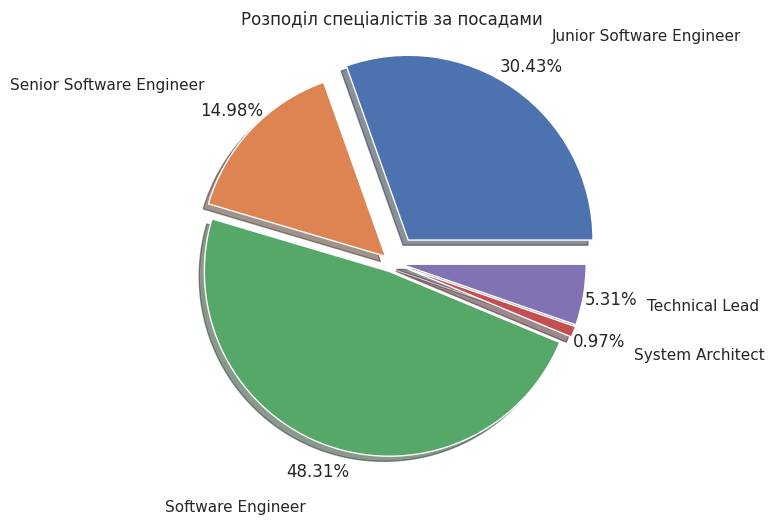

In [45]:
labels = grouped_specialists.index.tolist()
data = grouped_specialists.values.tolist()

explode = [0.15, 0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(8, 6))
plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)
plt.title("Розподіл спеціалістів за посадами")
plt.show()

In [13]:
aggregated_data = python_data.groupby("Посада").agg({'Зарплата на місяць': ['min', 'max']})

print(aggregated_data)

                         Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200


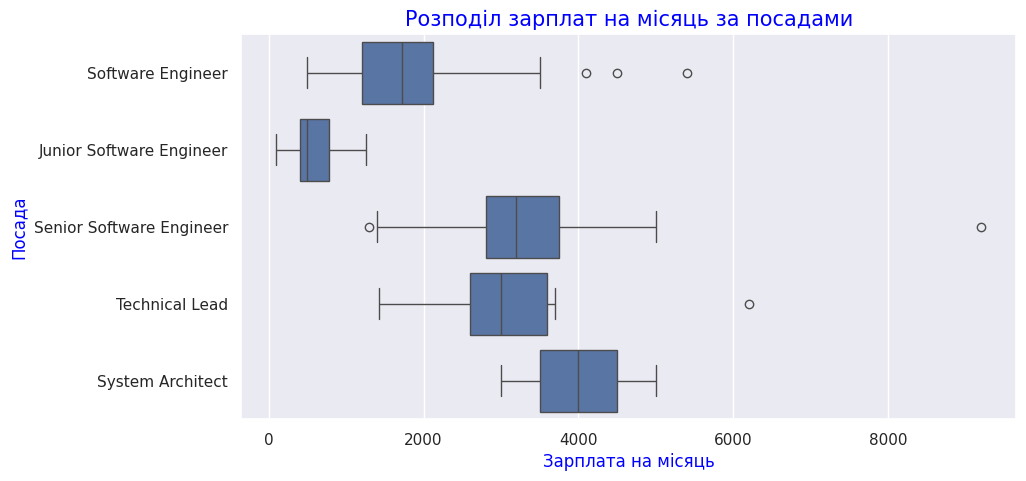

In [38]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='Зарплата на місяць', y='Посада', data=python_data, orient='h')
plt.xlabel('Зарплата на місяць', fontsize=12, color='#0000FF')
plt.ylabel('Посада', fontsize=12, color='#0000FF')
plt.title('Розподіл зарплат на місяць за посадами', fontsize=15, color='#0000FF')
plt.show()

In [15]:
def fill_avg_salary(row):
    # Вираховуємо середнє значення зарплати на місяць
    avg_salary = (row['Зарплата на місяць'] + row['Зміна зарплати за 12 місяців']) / 2
    return avg_salary

# Створюємо новий стовпчик "avg" з параметром inplace=True
python_data['avg'] = python_data.apply(fill_avg_salary, axis=1)

print(python_data)

         N                    Посада Мова програмування  \
12      13         Software Engineer             Python   
68      69         Software Engineer             Python   
87      88  Junior Software Engineer             Python   
114    115  Junior Software Engineer             Python   
143    144  Junior Software Engineer             Python   
...    ...                       ...                ...   
8546  8547         Software Engineer             Python   
8625  8626         Software Engineer             Python   
8635  8636  Senior Software Engineer             Python   
8673  8674  Junior Software Engineer             Python   
8695  8696         Software Engineer             Python   

     Загальний досвід роботи Досвід роботи на поточному місці  \
12                         1                  менше 3 місяців   
68                       1.5                              0.5   
87                       0.5                              0.5   
114                      1.5   

<ipython-input-15-6345e398a3d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data['avg'] = python_data.apply(fill_avg_salary, axis=1)


In [16]:
print(python_data['avg'].describe())


count     207.000000
mean     1064.826087
std       756.503554
min        50.000000
25%       500.000000
50%       950.000000
75%      1512.500000
max      5700.000000
Name: avg, dtype: float64


In [17]:
python_data.to_csv('Python_developer.csv', index=False)

Text(0.5, 1.0, 'Розподіл віку розробників за статтю')

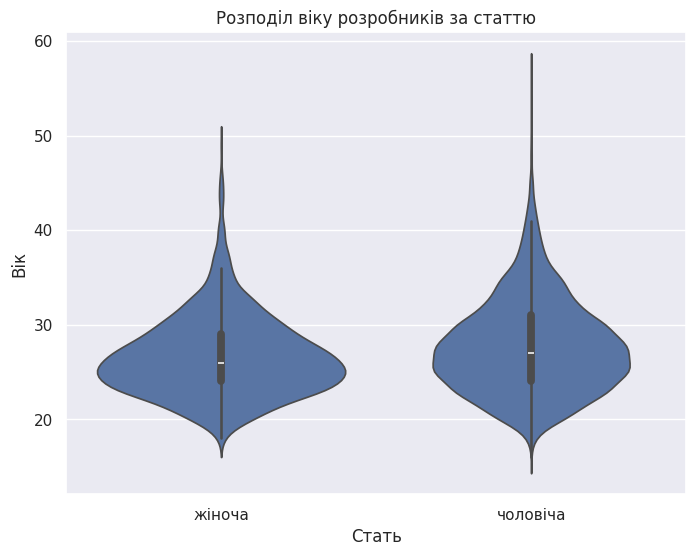

In [59]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Стать', y='Вік', data=new_table)

plt.title('Розподіл віку розробників за статтю')

Text(0.5, 1.0, "Зв'язок між мовою програмування та зарплатою")

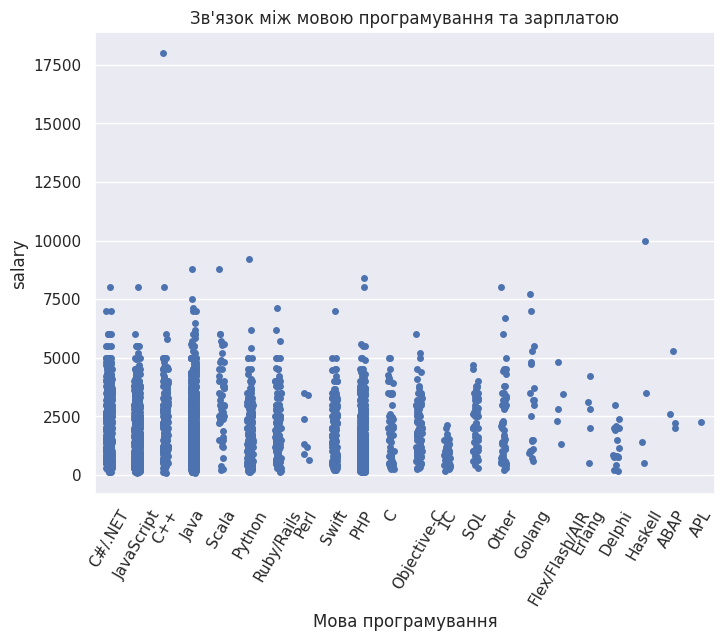

In [66]:
# Зв'язок між мовою програмування та зарплатою
plt.figure(figsize=(8, 6))
sns.stripplot(x='Мова програмування', y='salary', data=table)
plt.xticks(rotation=60)

plt.title("Зв'язок між мовою програмування та зарплатою")